In [ ]:
import math 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [ ]:
f1=pd.read_csv(r'data2.csv')
f=pd.read_csv(r'data1.csv')

In [ ]:
f.YEAR=f.YEAR.astype('str')
f.MO=f.MO.astype('str')
f.DY=f.DY.astype('str')
f['date']=f.YEAR+'/'+f.MO+'/'+f.DY
f.date=pd.to_datetime(f.date)

In [ ]:
f1.YEAR=f1.YEAR.astype('str')
f1.MO=f1.MO.astype('str')
f1.DY=f1.DY.astype('str')
f1['date']=f1.YEAR+'/'+f1.MO+'/'+f1.DY
f1.date=pd.to_datetime(f1.date)

In [ ]:
f.merge(f1,how='left',left_on='date',right_on='date')

df=f.merge(f1,how='left',left_on='date',right_on='date')

df.isna().sum()
df.to_csv(r'C:\Users\new.csv')

data=df.drop(columns=['LAT_y', 'LON_y', 'YEAR_y', 'MO_y', 'DY_y'], axis=1)

In [ ]:
data

,LAT_x,LON_x,YEAR_x,MO_x,DY_x,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,...,WS10M_RANGE,WS50M_MIN,WS10M_MIN,WS50M_MAX,WS10M_MAX,WS50M,WS10M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
0,36.78551,10.15781,1989,1,1,0.40,6.43,72.48,101.87,5.64,...,2.28,3.40,2.45,6.48,4.73,5.47,3.78,0.23,3.05,1.04
1,36.78551,10.15781,1989,1,2,0.19,6.53,78.22,101.87,6.43,...,3.03,3.44,2.49,6.52,5.52,4.96,3.63,0.42,2.33,1.89
2,36.78551,10.15781,1989,1,3,0.33,6.21,74.63,102.18,5.74,...,1.17,2.20,2.06,4.64,3.23,3.64,2.68,0.50,3.03,2.26
3,36.78551,10.15781,1989,1,4,0.12,6.59,81.43,102.42,4.44,...,1.66,1.09,0.89,3.50,2.55,2.06,1.56,0.24,3.08,1.08
4,36.78551,10.15781,1989,1,5,0.43,6.16,80.64,102.12,5.54,...,4.14,0.32,0.17,5.56,4.31,3.52,2.66,0.33,2.96,1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,36.78551,10.15781,2020,2,26,0.10,7.33,74.54,100.45,7.90,...,4.75,6.39,3.51,10.09,8.26,8.38,5.83,0.56,-999.00,3.91
11379,36.78551,10.15781,2020,2,27,0.03,6.18,67.61,100.96,8.14,...,4.57,2.70,1.91,9.12,6.47,6.74,4.96,0.52,-999.00,3.63
11380,36.78551,10.15781,2020,2,28,0.00,6.85,71.36,101.04,11.03,...,4.06,5.61,3.64,9.49,7.70,8.21,5.69,0.68,4.85,4.79
11381,36.78551,10.15781,2020,2,29,0.01,6.92,64.74,100.80,15.41,...,6.01,1.43,0.87,8.36,6.88,4.45,3.33,0.68,-999.00,4.87


In [ ]:
data=data.set_index('date')

In [ ]:
data.isnull().any()

LAT_x                False
LON_x                False
YEAR_x               False
MO_x                 False
DY_x                 False
PRECTOT              False
QV2M                 False
RH2M                 False
PS                   False
T2M_RANGE            False
TS                   False
T2MDEW               False
T2MWET               False
T2M_MAX              False
T2M_MIN              False
T2M                  False
WS50M_RANGE          False
WS10M_RANGE          False
WS50M_MIN            False
WS10M_MIN            False
WS50M_MAX            False
WS10M_MAX            False
WS50M                False
WS10M                False
KT                   False
CLRSKY_SFC_SW_DWN    False
ALLSKY_SFC_SW_DWN    False
dtype: bool

In [ ]:
f.shape

(11383, 17)

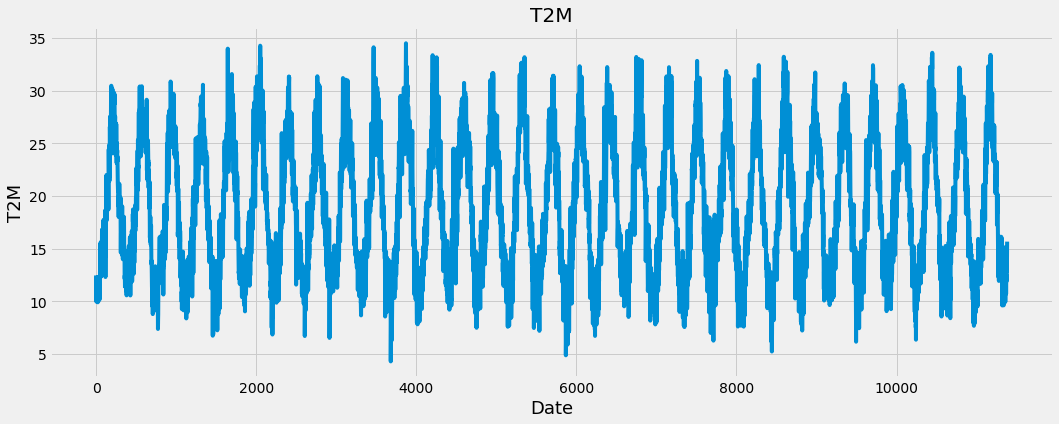

In [ ]:
plt.figure(figsize=(16,6))
plt.title ('T2M')
plt.plot(f['T2M'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('T2M', fontsize=18)
plt.show()

In [ ]:
#create new dataframe with only t2m column 
data=f.filter(['T2M'])
#convert to array 
dataset = data.values
#train longueur
training_data_len = math.ceil( len(dataset) * .8)
training_data_len


9107

In [ ]:
#scale the data 
scaler = MinMaxScaler (feature_range = (0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

array([[0.27019868],
       [0.24006623],
       [0.23940397],
       ...,
       [0.30562914],
       [0.35993377],
       [0.37649007]])

In [ ]:
#creat training data set 
#scaled training data set 
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y-train data set
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61 :
        print (x_train)
        print (y_train)
        print()
        
    

[array([0.27019868, 0.24006623, 0.23940397, 0.22715232, 0.19701987,
       0.18774834, 0.20927152, 0.23476821, 0.2384106 , 0.26225166,
       0.25728477, 0.25794702, 0.24900662, 0.26092715, 0.24900662,
       0.2307947 , 0.2192053 , 0.24933775, 0.26490066, 0.25927152,
       0.24834437, 0.2281457 , 0.18576159, 0.21821192, 0.22913907,
       0.23278146, 0.21688742, 0.20463576, 0.2115894 , 0.20198675,
       0.20033113, 0.19205298, 0.1897351 , 0.20596026, 0.22748344,
       0.21986755, 0.23311258, 0.21655629, 0.22218543, 0.21456954,
       0.21490066, 0.2281457 , 0.24635762, 0.22086093, 0.24536424,
       0.19470199, 0.20066225, 0.25198675, 0.22384106, 0.27019868,
       0.29470199, 0.32350993, 0.29470199, 0.27913907, 0.29768212,
       0.32384106, 0.37284768, 0.30562914, 0.30099338, 0.37019868])]
[0.35331125827814575]

[array([0.27019868, 0.24006623, 0.23940397, 0.22715232, 0.19701987,
       0.18774834, 0.20927152, 0.23476821, 0.2384106 , 0.26225166,
       0.25728477, 0.25794702, 0.24

In [ ]:
#convert x)train and y_train to numpy array
x_train, y_train = np.array(x_train) , np.array(y_train) 
# Reserve 1000 samples for validation
x_val = x_train[-1000:]
y_val = y_train[-1000:]


In [ ]:
#reshape th data 
x_train = np.reshape ( x_train, (x_train.shape [0],x_train.shape [1],1))
x_train.shape 



(9047, 60, 1)

In [ ]:
x_val = np.reshape ( x_val, (x_val.shape [0],x_val.shape [1],1))
x_val.shape 

(1000, 60, 1)

In [ ]:
from tensorflow.keras.layers import Dropout
#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences = True , input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False ))
model.add(Dense(25))
model.add(Dense(1))
model.add(Dropout(0.02))

In [ ]:
#compile the model
model.compile(optimizer = 'adam' , loss='mean_squared_error',metrics=['accuracy','mse','mape','mae'])

In [ ]:
#train the model

history=model.fit(x_train, y_train , batch_size=100 , epochs =15 ,validation_split=0.33)

Epoch 1/15
61/61 [==============================] - 12s 119ms/step - loss: 0.0216 - accuracy: 3.2998e-04 - mse: 0.0216 - mape: 40781.6172 - mae: 0.0982 - val_loss: 0.0050 - val_accuracy: 0.0000e+00 - val_mse: 0.0050 - val_mape: 15.3813 - val_mae: 0.0560
Epoch 2/15
61/61 [==============================] - 6s 102ms/step - loss: 0.0102 - accuracy: 3.2998e-04 - mse: 0.0102 - mape: 41797.0820 - mae: 0.0618 - val_loss: 0.0047 - val_accuracy: 0.0000e+00 - val_mse: 0.0047 - val_mape: 14.4588 - val_mae: 0.0536
Epoch 3/15
61/61 [==============================] - 6s 102ms/step - loss: 0.0104 - accuracy: 1.6499e-04 - mse: 0.0104 - mape: 37989.3281 - mae: 0.0604 - val_loss: 0.0045 - val_accuracy: 0.0000e+00 - val_mse: 0.0045 - val_mape: 13.8793 - val_mae: 0.0524
Epoch 4/15
61/61 [==============================] - 6s 103ms/step - loss: 0.0095 - accuracy: 3.2998e-04 - mse: 0.0095 - mape: 38940.5742 - mae: 0.0580 - val_loss: 0.0043 - val_accuracy: 0.0000e+00 - val_mse: 0.0043 - val_mape: 13.6403 - val

In [ ]:
#create the testing data set
#  create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

#create the data sets x_test and y_test 
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)
x_test

array([[0.59039735, 0.60860927, 0.62682119, ..., 0.28245033, 0.30364238,
        0.30960265],
       [0.60860927, 0.62682119, 0.67483444, ..., 0.30364238, 0.30960265,
        0.28543046],
       [0.62682119, 0.67483444, 0.63245033, ..., 0.30960265, 0.28543046,
        0.28410596],
       ...,
       [0.20794702, 0.17582781, 0.18178808, ..., 0.32317881, 0.31556291,
        0.2807947 ],
       [0.17582781, 0.18178808, 0.21291391, ..., 0.31556291, 0.2807947 ,
        0.30562914],
       [0.18178808, 0.21291391, 0.18543046, ..., 0.2807947 , 0.30562914,
        0.35993377]])

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


In [ ]:
# get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#get the root mean squared error RMSE
rmse = np.sqrt (np.mean( predictions - y_test)**2 )
rmse

0.2424447478225654

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


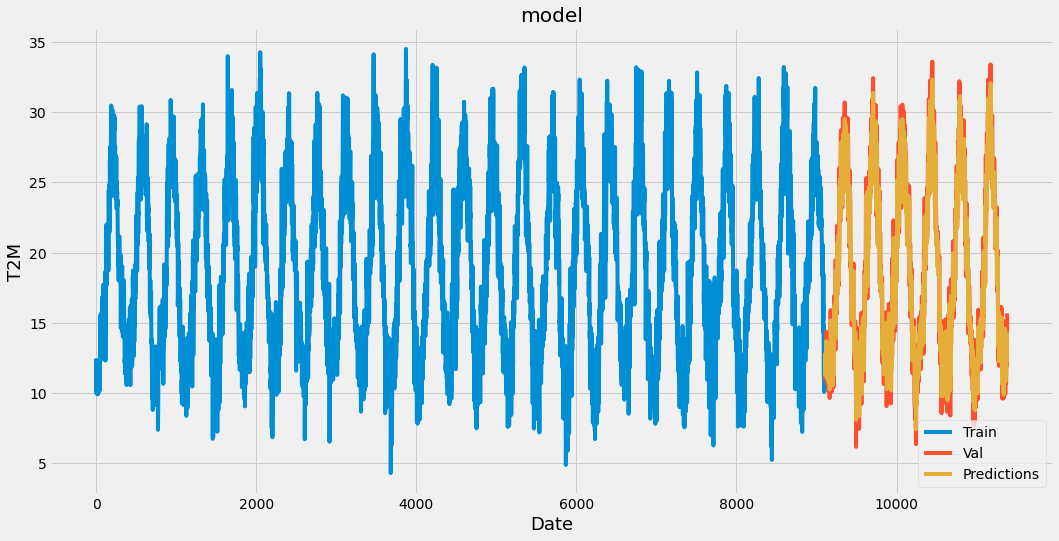

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualisation 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('T2M', fontsize=18)
plt.plot(train['T2M'])
plt.plot(valid[['T2M','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()




In [ ]:
#sHOW THE VALID AND PREDICTED PRiCES
valid

,T2M,Predictions
9107,12.92,12.825437
9108,12.88,12.442525
9109,12.23,12.329662
9110,12.85,11.958708
9111,12.27,12.281183
...,...,...
11378,13.83,13.514588
11379,12.78,13.595329
11380,13.53,12.934195
11381,15.17,13.190044


In [ ]:
history.history

{'accuracy': [0.0003299785603303462,
  0.0003299785603303462,
  0.0001649892801651731,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0001649892801651731,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462],
 'loss': [0.02155923657119274,
  0.010200463235378265,
  0.01041240431368351,
  0.009467458352446556,
  0.008261618204414845,
  0.008623992092907429,
  0.008346198126673698,
  0.009046556428074837,
  0.008157802745699883,
  0.007582315243780613,
  0.009636027738451958,
  0.007231646217405796,
  0.007428532466292381,
  0.006733654998242855,
  0.007051621098071337],
 'mae': [0.09818144142627716,
  0.06179719418287277,
  0.06035689637064934,
  0.05796893313527107,
  0.055113498121500015,
  0.05486404523253441,
  0.05306106060743332,
  0.053204722702503204,
  0.05107575282454491,
  0.048088498413562775,
  0.0

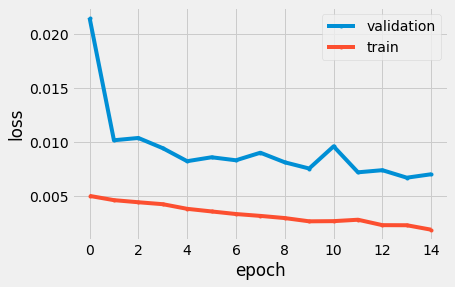

In [ ]:
# summarize history for loss
plt.subplot(1,1,1)
plt.plot(history.history['loss'], '.-')
plt.plot(history.history['val_loss'], '.-')


plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend([ 'validation','train'], loc='upper right')
plt.show()

In [ ]:
# Import the folium library
import folium

# Build the default map for a specific location (Tunisie)
map = folium.Map(location=[float(f.LAT_x[0]),f.LON_x[0]],zoom_start=7)

#save in a file
map.save("index.html")

tooltip = "Click Here For More Info"

marker = folium.Marker(location=[float(f.LAT_x[0]),f.LON_x[0]],popup=predictions[len(predictions)-1],tooltip=tooltip)
marker.add_to(map)
map

AttributeError: ignored

In [ ]:
f.index[f.shape[0]-1]

11382

In [ ]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history.history['loss']

[0.02155923657119274,
 0.010200463235378265,
 0.01041240431368351,
 0.009467458352446556,
 0.008261618204414845,
 0.008623992092907429,
 0.008346198126673698,
 0.009046556428074837,
 0.008157802745699883,
 0.007582315243780613,
 0.009636027738451958,
 0.007231646217405796,
 0.007428532466292381,
 0.006733654998242855,
 0.007051621098071337]

In [ ]:
history.history


{'accuracy': [0.0003299785603303462,
  0.0003299785603303462,
  0.0001649892801651731,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0001649892801651731,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462,
  0.0003299785603303462],
 'loss': [0.02155923657119274,
  0.010200463235378265,
  0.01041240431368351,
  0.009467458352446556,
  0.008261618204414845,
  0.008623992092907429,
  0.008346198126673698,
  0.009046556428074837,
  0.008157802745699883,
  0.007582315243780613,
  0.009636027738451958,
  0.007231646217405796,
  0.007428532466292381,
  0.006733654998242855,
  0.007051621098071337],
 'mae': [0.09818144142627716,
  0.06179719418287277,
  0.06035689637064934,
  0.05796893313527107,
  0.055113498121500015,
  0.05486404523253441,
  0.05306106060743332,
  0.053204722702503204,
  0.05107575282454491,
  0.048088498413562775,
  0.0